<span style="color:#87CEEB; font-size:30px; font-weight:bold;">Desafío - Tabaquismo y Gestación</span><br>
<span style="font-size:15px;">Marcela Alejandra Barrera Puentes</span>

<span style="font-size:15px;">En este desafío validaremos nuestros conocimientos sobre variables aleatorias. Para lograrlo, necesitarás aplicar lo visto en clases.
Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">Descripción</span><br>
<span style="font-size:15px;">Un grupo de investigadores está interesado en analizar la relación entre el hábito de fumar con el crecimiento de los bebés en edad gestacional. Para esto han recopilado los datos guardados en el dataset baby.csv, que contiene los siguientes campos de datos:<br>
Birth.Weight : Peso del bebe<br>
Gestational.Days: Días de gestación<br>
Maternal.Age: Edad de la madre<br>
Maternal.Height: Altura de la madre<br>
Maternal.Pregnancy.Weight: Peso de la madre<br>
Maternal.Smoker:  ¿Es la madre fumadora? (True: fumadora, False: no es fumadora)
A partir de estos datos se solicita:</span>

In [300]:
# Se importa librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from scipy.stats import norm
# Se lee el archivo csv: baby.csv
df = pd.read_csv('/Users/marce/Projects_Marce/Desafio_Latam/baby.csv', delimiter = ',')
# Buena práctica: se da una mirada a las primeras filas del DataFrame y las columnas que lo conforman
df.head()
print(df.head())
"""
Se observan las 7 columnas: [1] Unnamed, [2] Birth.Weight, [3] Gestational.Days, [4]Maternal.Age, [5] Maternal.Height, [6] Maternal.Pregnancy.Weight,
[7] Maternal.Smoker
"""
# Buena práctica: se observa el tipo de información
df.info()
"""
Se observa que 6 de las 7 columnas son del tipo de dato integer. En resumen existen 1174 entradas desde el registro 0 al 1173 y
7 columnas
"""
df
"""
Se genera un resumen estadístico para las columnas numéricas con df.describe(), que en este caso son 4: work_year, salary, salary_in_usd y
remote_ratio
"""
df.describe()

   Unnamed: 0  Birth.Weight  Gestational.Days  Maternal.Age  Maternal.Height  \
0           1           120               284            27               62   
1           2           113               282            33               64   
2           3           128               279            28               64   
3           4           108               282            23               67   
4           5           136               286            25               62   

   Maternal.Pregnancy.Weight  Maternal.Smoker  
0                        100            False  
1                        135            False  
2                        115             True  
3                        125             True  
4                         93            False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0  

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


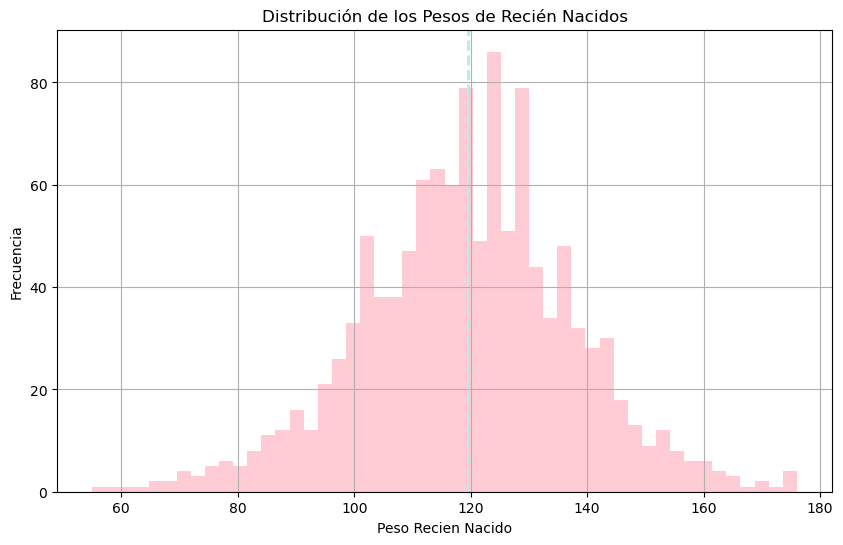

El promedio de los pesos de recién nacidos es: 119.46
La mediana de los pesos de recién nacidos es: 120.00
La(s) moda(s) de los pesos de recién nacidos es(son):
115.00
La desviación estándar de los pesos de recién nacidos es: 18.33
Los quintiles de los pesos de recién nacidos son:
0.2    104.0
0.4    116.0
0.6    124.0
0.8    134.0
1.0    176.0
Name: Birth.Weight, dtype: float64
El rango de los pesos de recién nacidos es: 121.00


In [302]:
# Se utiliza Birth.Weight para calcular: promedio, mediana, moda, desviación estándar, quintiles y rangos
promedio = df['Birth.Weight'].mean()
mediana = df['Birth.Weight'].median()
moda = df['Birth.Weight'].mode()
desviacion_std = df['Birth.Weight'].std()
quintiles = df['Birth.Weight'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Birth.Weight'].max() - df['Birth.Weight'].min()
# Se explora gráficamente la información
# Se grafica histograma de Birth.Weight
plt.figure (figsize=(10, 6))
plt.hist(df['Birth.Weight'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
plt.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')
plt.title('Distribución de los Pesos de Recién Nacidos')
plt.xlabel('Peso Recien Nacido')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
# Se muestra resultados
print(f"El promedio de los pesos de recién nacidos es: {promedio:.2f}")
print(f"La mediana de los pesos de recién nacidos es: {mediana:.2f}")
print(f"La(s) moda(s) de los pesos de recién nacidos es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de los pesos de recién nacidos es: {desviacion_std:.2f}")
print(f"Los quintiles de los pesos de recién nacidos son:")
print(quintiles)
print(f"El rango de los pesos de recién nacidos es: {rango:.2f}")

<span style="font-size:15px;">El promedio, mediana y moda de los Pesos de Recién Nacidos son relativamente similares o cercanos. Existe simetría en la distribución. Por tanto, se tiende a distribución normal. La distribución normal es un patrón o forma de distribución de datos que se asemeja a una campana simétrica. En este tipo de distribución la mayoría de los datos se encuentran cerca del valor promedio, y a medida que nos alejamos de él, la frecuencia de los valores disminuye gradual. Se oberva en el gráfico de Pesos de Recién Nacidos: Simetría, Media, Mediana y Moda Similares, Forma Unimodal y Tails o Colas que tienden a infinito</span>

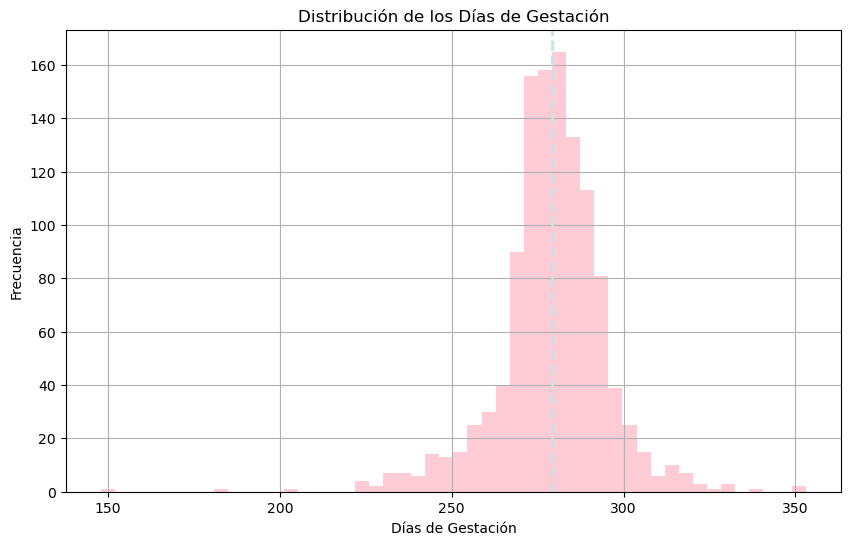

El promedio de los días de gestación son: 279.10
La mediana de los días de gestación son: 280.00
La(s) moda(s) de los días de gestación es(son):
282.00
La desviación estándar de los días de gestación son: 16.01
Los quintiles de los días de gestación son:
0.2    270.0
0.4    277.0
0.6    283.0
0.8    290.0
1.0    353.0
Name: Gestational.Days, dtype: float64
El rango de los días de gestación son: 205.00


In [304]:
# Se utiliza Gestational.Days para calcular: promedio, mediana, moda, desviación estándar, quintiles y rangos
promedio = df['Gestational.Days'].mean()
mediana = df['Gestational.Days'].median()
moda = df['Gestational.Days'].mode()
desviacion_std = df['Gestational.Days'].std()
quintiles = df['Gestational.Days'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Gestational.Days'].max() - df['Gestational.Days'].min()
# Se grafica histograma de Gestational.Days
plt.figure (figsize=(10, 6))
plt.hist(df['Gestational.Days'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
plt.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')
plt.title('Distribución de los Días de Gestación')
plt.xlabel('Días de Gestación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
# Se muestra resultados
print(f"El promedio de los días de gestación son: {promedio:.2f}")
print(f"La mediana de los días de gestación son: {mediana:.2f}")
print(f"La(s) moda(s) de los días de gestación es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de los días de gestación son: {desviacion_std:.2f}")
print(f"Los quintiles de los días de gestación son:")
print(quintiles)
print(f"El rango de los días de gestación son: {rango:.2f}")

<span style="font-size:15px;">El promedio, mediana y moda de los Días de Gestación son relativamente similares o cercanos. Existe simetría en la distribución. Por tanto, se tiende a distribución normal. La distribución normal es un patrón o forma de distribución de datos que se asemeja a una campana simétrica. En este tipo de distribución la mayoría de los datos se encuentran cerca del valor promedio, y a medida que nos alejamos de él, la frecuencia de los valores disminuye gradual. Se oberva en el gráfico de Días de Gestación: Simetría, Media, Mediana y Moda Similares, Forma Unimodal y Tails o Colas que tienden a infinito aunque en un rango más acotado que en el gráfico anterior</span>

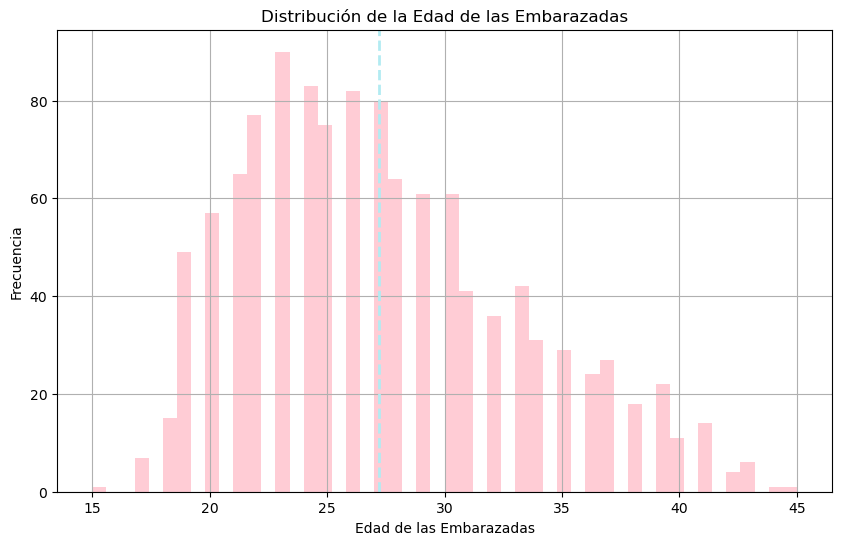

El promedio de edad de las embarazadas es: 27.23
La mediana de edad de las embarazadas es: 26.00
La(s) moda(s) de edad de las embarazadas es(son):
23.00
La desviación estándar de edad de las embarazadas es: 5.82
Los quintiles de edad de las embarazadas es:
0.2    22.0
0.4    25.0
0.6    28.0
0.8    32.0
1.0    45.0
Name: Maternal.Age, dtype: float64
El rango de edad de las embarazadas es: 30.00


In [306]:
# Se utiliza Maternal.Age para calcular: promedio, mediana, moda, desviación estándar, quintiles y rangos
promedio = df['Maternal.Age'].mean()
mediana = df['Maternal.Age'].median()
moda = df['Maternal.Age'].mode()
desviacion_std = df['Maternal.Age'].std()
quintiles = df['Maternal.Age'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Maternal.Age'].max() - df['Maternal.Age'].min()
# Se grafica histograma de Maternal.Age
plt.figure (figsize=(10, 6))
plt.hist(df['Maternal.Age'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
plt.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')
plt.title('Distribución de la Edad de las Embarazadas')
plt.xlabel('Edad de las Embarazadas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
# Se muestra resultados
print(f"El promedio de edad de las embarazadas es: {promedio:.2f}")
print(f"La mediana de edad de las embarazadas es: {mediana:.2f}")
print(f"La(s) moda(s) de edad de las embarazadas es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de edad de las embarazadas es: {desviacion_std:.2f}")
print(f"Los quintiles de edad de las embarazadas es:")
print(quintiles)
print(f"El rango de edad de las embarazadas es: {rango:.2f}")

<span style="font-size:15px;">Estos datos, dado que son edades expresadas en años absolutos, son discretos a diferencia de los Pesos de Recién Nacidos y Días de Gestación que eran más bien contínuos. El promedio, mediana y moda de la Edad de las Embarazadas son relativamente similares o cercanos. Existe simetría relativa en la distribución, con un sesgo hacia la izquierda. Por tanto, se tiende a distribución normal. La distribución normal es un patrón o forma de distribución de datos que se asemeja a una campana simétrica. En este tipo de distribución la mayoría de los datos se encuentran cerca del valor promedio, y a medida que nos alejamos de él, la frecuencia de los valores disminuye gradual. Se oberva en el gráfico de Edad de las Embarazadas: Simetría, Media, Mediana y Moda Similares, Forma Unimodal y Tails o Colas que tienden a infinito con un sesgo más acotado a la izquierda</span>

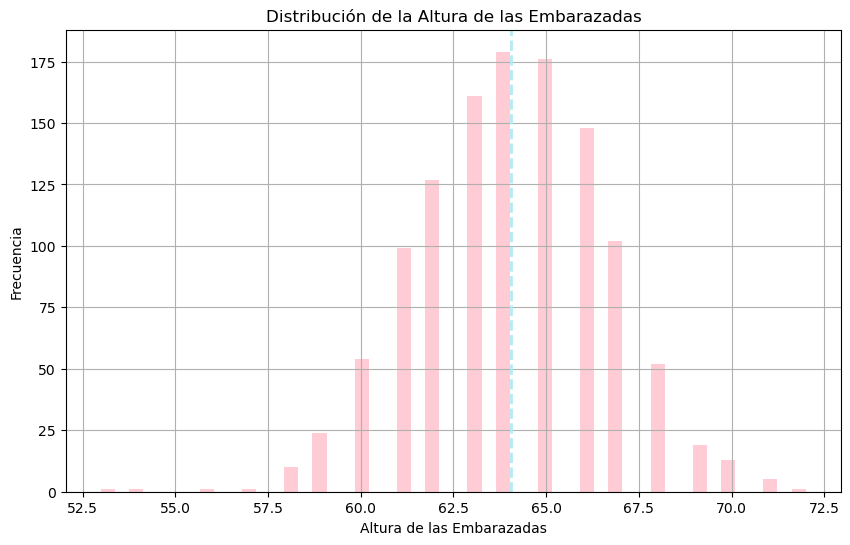

El promedio de las alturas de las embarazadas es: 64.05
La mediana de las alturas de las embarazadas es: 64.00
La(s) moda(s) de las alturas de las embarazadas es(son):
64.00
La desviación estándar de las alturas de las embarazadas es: 2.53
Los quintiles de las alturas de las embarazadas es:
0.2    62.0
0.4    63.0
0.6    65.0
0.8    66.0
1.0    72.0
Name: Maternal.Height, dtype: float64
El rango de de las alturas de las embarazadas es: 19.00


In [309]:
# Se utiliza Maternal.Height para calcular: promedio, mediana, moda, desviación estándar, quintiles y rangos
promedio = df['Maternal.Height'].mean()
mediana = df['Maternal.Height'].median()
moda = df['Maternal.Height'].mode()
desviacion_std = df['Maternal.Height'].std()
quintiles = df['Maternal.Height'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Maternal.Height'].max() - df['Maternal.Height'].min()
# Se grafica histograma de Maternal.Height
plt.figure (figsize=(10, 6))
plt.hist(df['Maternal.Height'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
plt.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')
plt.title('Distribución de la Altura de las Embarazadas')
plt.xlabel('Altura de las Embarazadas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
# Se muestra resultados
print(f"El promedio de las alturas de las embarazadas es: {promedio:.2f}")
print(f"La mediana de las alturas de las embarazadas es: {mediana:.2f}")
print(f"La(s) moda(s) de las alturas de las embarazadas es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de las alturas de las embarazadas es: {desviacion_std:.2f}")
print(f"Los quintiles de las alturas de las embarazadas es:")
print(quintiles)
print(f"El rango de de las alturas de las embarazadas es: {rango:.2f}")

<span style="font-size:15px;">El promedio, mediana y moda de la Altura de las Embarazadas son relativamente similares o cercanos. Existe simetría en la distribución. Por tanto, se tiende a distribución normal. La distribución normal es un patrón o forma de distribución de datos que se asemeja a una campana simétrica. En este tipo de distribución la mayoría de los datos se encuentran cerca del valor promedio, y a medida que nos alejamos de él, la frecuencia de los valores disminuye gradual. Se oberva en el gráfico de Altura de las Embarazadas: Simetría, Media, Mediana y Moda Similares, Forma Unimodal y Tails o Colas que tienden a infinito aunque en un rango acotado </span>

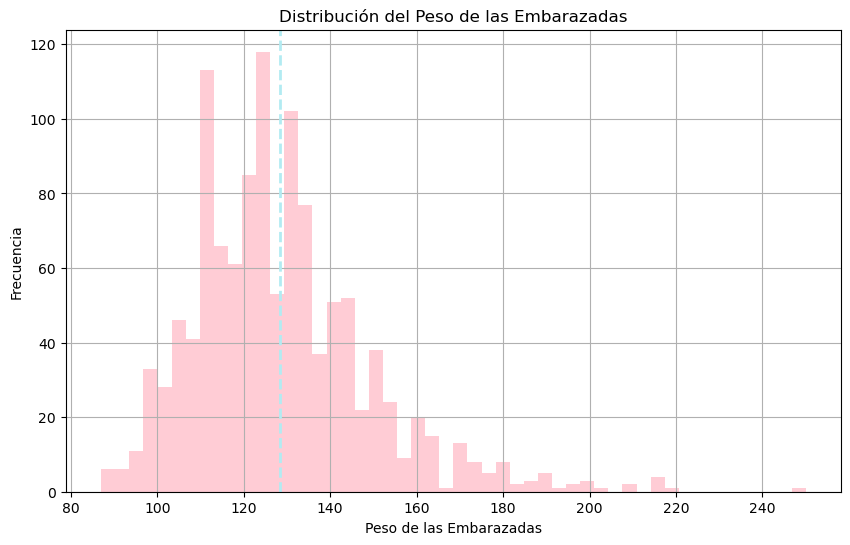

El promedio del peso de las embarazadas es: 128.48
La mediana del peso de las embarazadas es: 125.00
La(s) moda(s) del peso de las embarazadas es(son):
130.00
La desviación estándar del peso de las embarazadas es: 20.73
Los quintiles del peso de las embarazadas es:
0.2    111.0
0.4    121.0
0.6    130.0
0.8    143.0
1.0    250.0
Name: Maternal.Pregnancy.Weight, dtype: float64
El rango del peso de las embarazadas es: 163.00


In [311]:
# Se utiliza Maternal.Pregnancy.Weight para calcular: promedio, mediana, moda, desviación estándar, quintiles y rangos
promedio = df['Maternal.Pregnancy.Weight'].mean()
mediana = df['Maternal.Pregnancy.Weight'].median()
moda = df['Maternal.Pregnancy.Weight'].mode()
desviacion_std = df['Maternal.Pregnancy.Weight'].std()
quintiles = df['Maternal.Pregnancy.Weight'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Maternal.Pregnancy.Weight'].max() - df['Maternal.Pregnancy.Weight'].min()
# Se grafica histograma de Maternal.Pregnancy.Weight
plt.figure (figsize=(10, 6))
plt.hist(df['Maternal.Pregnancy.Weight'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
plt.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')
plt.title('Distribución del Peso de las Embarazadas')
plt.xlabel('Peso de las Embarazadas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
# Se muestra resultados
print(f"El promedio del peso de las embarazadas es: {promedio:.2f}")
print(f"La mediana del peso de las embarazadas es: {mediana:.2f}")
print(f"La(s) moda(s) del peso de las embarazadas es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar del peso de las embarazadas es: {desviacion_std:.2f}")
print(f"Los quintiles del peso de las embarazadas es:")
print(quintiles)
print(f"El rango del peso de las embarazadas es: {rango:.2f}")

<span style="font-size:15px;">El promedio, mediana y moda del Peso de las Embarazadas son relativamente similares o cercanos. Existe simetría en la distribución. Por tanto, se tiende a distribución normal. La distribución normal es un patrón o forma de distribución de datos que se asemeja a una campana simétrica. En este tipo de distribución la mayoría de los datos se encuentran cerca del valor promedio, y a medida que nos alejamos de él, la frecuencia de los valores disminuye gradual. Se oberva en el gráfico del Peso de las Embarazadas: Simetría, Media, Mediana y Moda Similares, Forma Unimodal y Tails o Colas que tienden a infinito aunque con un sesgo de infinito hacia la deerecha</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">2.</span>
<span style="font-size:15px;">Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.</span><br>
<span style="font-size:15px;">El promedio, mediana y moda de los Pesos de Recién Nacidos son relativamente similares o cercanos. Tal y como se apreció en el primer gráfico de este desarrollo. Existe simetría en la distribución. Por tanto, se tiende a distribución normal. La distribución normal es un patrón o forma de distribución de datos que se asemeja a una campana simétrica. En este tipo de distribución la mayoría de los datos se encuentran cerca del valor promedio, y a medida que nos alejamos de él, la frecuencia de los valores disminuye gradual. Se oberva en el gráfico de Pesos de Recién Nacidos: Simetría, Media, Mediana y Moda Similares, Forma Unimodal y Tails o Colas que tienden a infinito</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">3.</span>
<span style="font-size:15px;">Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.</span><br>

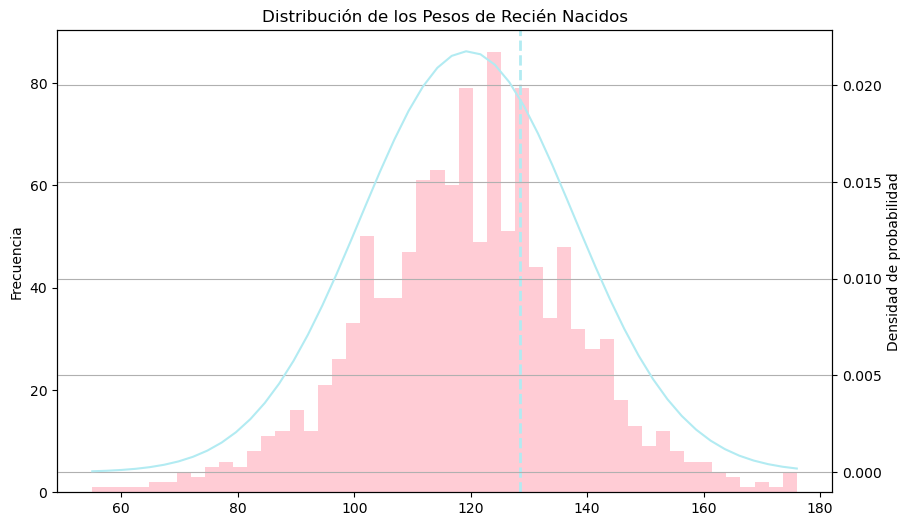

In [315]:
mu = df['Birth.Weight'].mean()
sigma = df['Birth.Weight'].std()
mínimo = df['Birth.Weight'].min()
máximo = df['Birth.Weight'].max()
x = np.linspace(mínimo, máximo)
pdf = norm.pdf(x,loc=mu,scale=sigma)

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.hist(df['Birth.Weight'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
ax1.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')

ax2 = ax1.twinx()
ax2.plot(x, pdf, color='#B2EBF2', label='PDF')

plt.title('Distribución de los Pesos de Recién Nacidos')
plt.xlabel('Peso Recien Nacido')
ax1.set_ylabel('Frecuencia')
ax2.set_ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()


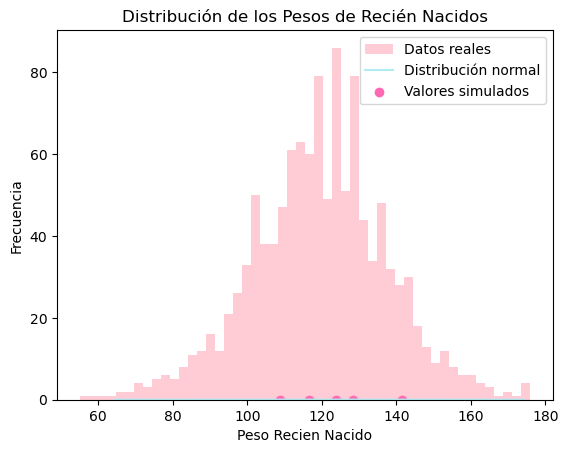

In [317]:
# Generar 5 valores diferentes utilizando la distribución normal
valores_simulados = norm.rvs(loc=mu, scale=sigma, size=5)

# Gráfico de histograma de los datos reales
plt.hist(df['Birth.Weight'], bins=50, color='#FFC0CB', alpha=0.8, label='Datos reales')

# Línea que representa la distribución normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y, color='#B2EBF2', label='Distribución normal')

# Puntos que representan los valores simulados
plt.scatter(valores_simulados, np.zeros_like(valores_simulados), color='#FF69B4', label='Valores simulados')

plt.title('Distribución de los Pesos de Recién Nacidos')
plt.xlabel('Peso Recien Nacido')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">4.</span>
<span style="font-size:15px;">Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.</span><br>

In [319]:
# Estadísticas descriptivas para los pesos de los bebés de madres fumadoras
pesos_fumadoras = df[df['Maternal.Smoker'] == True]['Birth.Weight']
print("Estadísticas descriptivas para los pesos de los bebés de madres fumadoras:")
print(pesos_fumadoras.describe())
# Estadísticas descriptivas para los pesos de los bebés de madres no fumadoras
pesos_no_fumadoras = df[df['Maternal.Smoker'] == False]['Birth.Weight']
print("Estadísticas descriptivas para los pesos de los bebés de madres no fumadoras:")
print(pesos_no_fumadoras.describe())


Estadísticas descriptivas para los pesos de los bebés de madres fumadoras:
count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth.Weight, dtype: float64
Estadísticas descriptivas para los pesos de los bebés de madres no fumadoras:
count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth.Weight, dtype: float64
